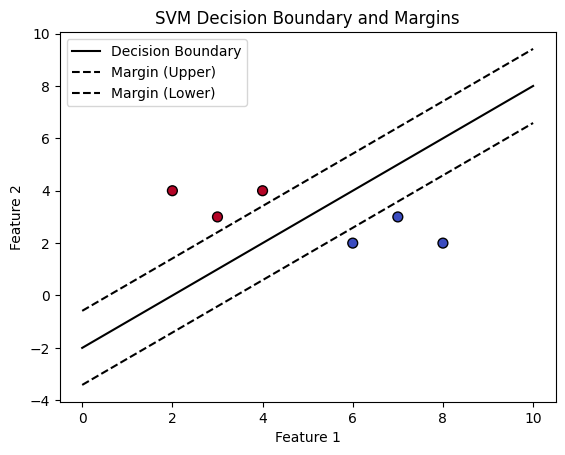

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 데이터 생성
X = np.array([[2, 4], [3, 3], [4, 4], [6, 2], [7, 3], [8, 2]])
y = np.array([1, 1, 1, -1, -1, -1])  # 클래스 라벨

# SVM 모델 학습
model = SVC(kernel='linear')
model.fit(X, y)

# 결정 경계와 마진 계산
w = model.coef_[0]
b = model.intercept_[0]
x_range = np.linspace(0, 10, 100)
decision_boundary = -(w[0] * x_range + b) / w[1]
margin_upper = decision_boundary + 1 / np.sqrt(np.sum(w**2))
margin_lower = decision_boundary - 1 / np.sqrt(np.sum(w**2))

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=50)
plt.plot(x_range, decision_boundary, 'k-', label="Decision Boundary")
plt.plot(x_range, margin_upper, 'k--', label="Margin (Upper)")
plt.plot(x_range, margin_lower, 'k--', label="Margin (Lower)")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary and Margins")
plt.show()

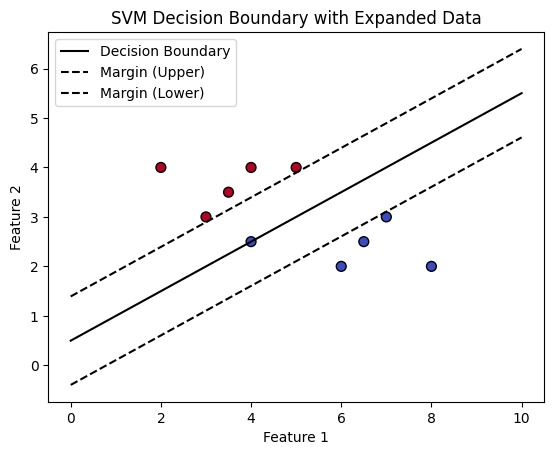

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 기존 데이터
X = np.array([[2, 4], [3, 3], [4, 4], [6, 2], [7, 3], [8, 2]])
y = np.array([1, 1, 1, -1, -1, -1])  # 클래스 라벨

# 새로운 데이터 추가 (마진 근처와 경계 안쪽)
new_points = np.array([
    [3.5, 3.5],  # 마진 안쪽 (클래스 1)
    [6.5, 2.5],  # 마진 안쪽 (클래스 -1)
    [4, 2.5],    # 마진 안쪽 (클래스 -1)
    [5, 4]       # 마진 근처 (클래스 1)
])
new_labels = np.array([1, -1, -1, 1])

# 기존 데이터에 추가
X = np.vstack([X, new_points])
y = np.hstack([y, new_labels])

# SVM 모델 학습
model = SVC(kernel='linear')
model.fit(X, y)

# 결정 경계와 마진 계산
w = model.coef_[0]
b = model.intercept_[0]
x_range = np.linspace(0, 10, 100)
decision_boundary = -(w[0] * x_range + b) / w[1]
margin_upper = decision_boundary + 1 / np.sqrt(np.sum(w**2))
margin_lower = decision_boundary - 1 / np.sqrt(np.sum(w**2))

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=50)
plt.plot(x_range, decision_boundary, 'k-', label="Decision Boundary")
plt.plot(x_range, margin_upper, 'k--', label="Margin (Upper)")
plt.plot(x_range, margin_lower, 'k--', label="Margin (Lower)")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Expanded Data")
plt.show()

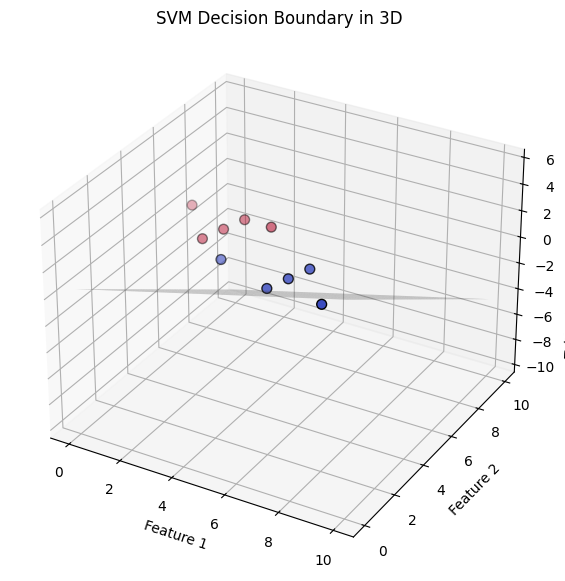

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Z 축 추가 (기본적으로 Feature 2 값을 Z 값으로 설정)
z_values = X[:, 1]  # 기존 Feature 2를 Z 값으로 활용

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
scatter = ax.scatter(X[:, 0], X[:, 1], z_values, c=y, cmap="coolwarm", edgecolor="k", s=50)

# 3D 평면 그리기 (결정 경계)
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
zz = -(w[0] * xx + w[1] * yy + b) / w[1]  # 결정 경계의 Z 값
ax.plot_surface(xx, yy, zz, alpha=0.3, color="gray", edgecolor='none')

# 축 라벨
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Z (Feature 2 for Visualization)")
ax.set_title("SVM Decision Boundary in 3D")

plt.show()